In [65]:
#IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [66]:
#LOADING THE DATASET
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [67]:
#CONVERTING THE DATA TO A PANDAS DATAFRAME
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [68]:
#ADDING THE TARGET VARIABLE TO THE DATAFRAME
data['Species'] = iris.target

In [69]:
#REPLACING THE CATEGORIES OF THE TARGET VARIABLE WITH THE ACTUAL SPECIES NAMES
target_dict = dict(zip(np.unique(iris.target), np.unique(iris.target_names)))
data['Species'] = data['Species'].replace(target_dict)

In [70]:
#SEPARATING THE INDEPENDENT AND DEPENDENT VARIABLES
X = data.drop(columns="Species")
y = data["Species"]
names_features = X.columns
target_labels = y.unique()
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2     

In [71]:
#SPLITTING THE DATASET INTO TRAINING AND TESTING DATASETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

In [72]:
#CREATING AN INSTANCE OF THE DECISION TREE CLASSIFIER
dtc = DecisionTreeClassifier(max_depth=5, random_state=93)

In [73]:
#FITTING THE TRAINING DATA TO THE MODEL
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=93)

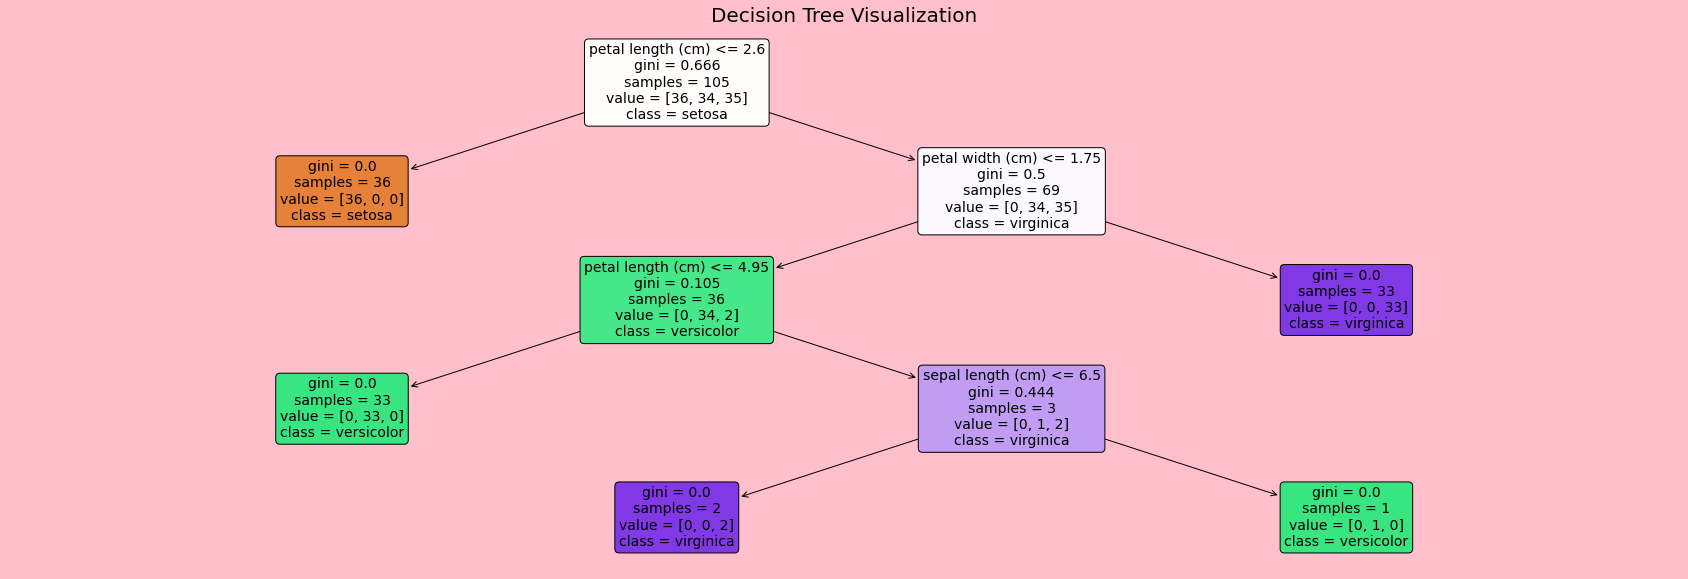

In [74]:
#PLOTTING THE DECISION TREE
plt.figure(figsize=(30, 10), facecolor='pink')
plot_tree(dtc, feature_names=names_features, class_names=target_labels, rounded=True, filled=True, fontsize=14)
plt.title("Decision Tree Visualization", fontsize=20)
plt.show()
#MAKING PREDICTIONS
y_pred = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

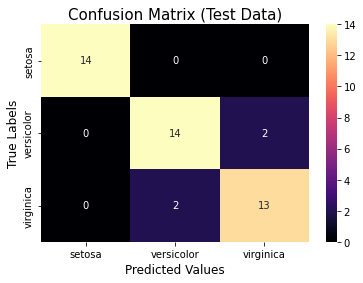

In [75]:
#CONFUSION MATRIX FOR TEST DATA
conf_matrix_test = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='g', cmap='magma', xticklabels=target_labels, yticklabels=target_labels)
plt.title("Confusion Matrix (Test Data)", fontsize=15)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.show()

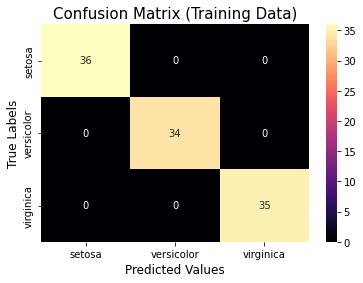

In [76]:
#CONFUSION MATRIX FOR TRAINING DATA
conf_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix_train, annot=True, fmt='g', cmap='magma', xticklabels=target_labels, yticklabels=target_labels)
plt.title("Confusion Matrix (Training Data)", fontsize=15)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.show()

In [77]:
#ACCURACY ON TRAINING DATA
training_data_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy on training data = ", training_data_accuracy)

Accuracy on training data =  1.0


In [78]:
#ACCURACY ON TEST DATA
testing_data_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing data = ", testing_data_accuracy)

Accuracy on testing data =  0.9111111111111111


In [79]:
#BINARY CLASSIFICATION FOR ROC-AUC CURVE (Binarizing for multi-class)
y_test_binarized = label_binarize(y_test.map({name: idx for idx, name in enumerate(target_labels)}), classes=[0, 1, 2])
y_test_prob = dtc.predict_proba(X_test)

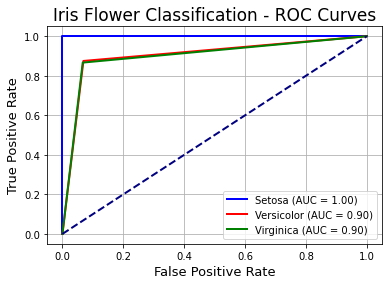

In [80]:
#COMPUTE ROC CURVE AND AUC FOR EACH CLASS
fpr = {}
tpr = {}
roc_auc = {}

class_names = ['Setosa', 'Versicolor', 'Virginica']  #Actual class names

for i in range(3):  #3 classes in Iris dataset
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#PLOT ROC CURVES FOR EACH CLASS
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

#ADD DIAGONAL LINE FOR REFERENCE
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.title("Iris Flower Classification - ROC Curves", fontsize=17)
plt.xlabel("False Positive Rate", fontsize=13)
plt.ylabel("True Positive Rate", fontsize=13)
plt.legend(loc="lower right")
plt.grid()
plt.show()